# Proyek Analisis Data: [Bike sharing dataset]
- **Nama:** [Reynald David Oenata]
- **Email:** [m320b4ky3779@bangkit.academy]
- **ID Dicoding:** [Reynald David Oenata]

## Menentukan Pertanyaan Bisnis

- Kapan orang paling banyak orang menyewa sepeda
- Bagaimana perbandingan penyewaan sepeda setiap bulan selama 2 tahun
- Tentukan season yang paling banyak orang menyewa sepeda

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [167]:
#Data Day
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [168]:
#Data Hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Perbedaan terdapat pada di kolom hr pada tabel hour

### Assessing Data

Menilai Data Day

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada kolom dteday, terdapat kesalahan datatype yang seharusnya adalah datetime

In [91]:
print("Jumlah Duplicate: ", day_df.duplicated().sum())

Jumlah Duplicate:  0


In [92]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [93]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Menilai Data Hour

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print("Jumlah Duplicate: ", hour_df.duplicated().sum())

Jumlah Duplicate:  0


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [14]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Kedua Tabel tidak memiliki data outlier atau data yang berada di luar dari rata" sampelnya yang dapat dilihat dari fungsi min dan max pada method describe()
- Data Type dari kolom dteday pada kedua tabel seharusnya date time

### Cleaning Data

Mengubah datatype dtday menjadi datetime

In [94]:
column = "dteday"
day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [95]:
column = "dteday"
hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengubah angka" menjadi teks agar bisa lebih mudah di analisis berdasarkan Readme.txt

In [169]:
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['yr']= day_df['yr'].map({
    0: '2011', 1: '2012'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Few Clouds',
    2: 'Cloudy/Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Cloudy/Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Cloudy/Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Few Clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Few Clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Few Clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kita telah mengubah data type dari kolom dtday pada kedua tabel dengan library pandas yaitu to_datetime agar data typenya menjadi datetime
- Kita juga telah mengubah data angka yang bisa diubah menjadi kata-kata

## Exploratory Data Analysis (EDA)

### Explore Data Day


In [98]:
day_df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Dapat dilihat pada tabel diatas, Fall memiliki banyak penyewa terbanyak dan Spring memiliki banyak penyewa terkecil

In [99]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": ["sum"]
})

cnt
              sum
yr   mnth        
2011 Apr    94870
     Aug   136691
     Dec    87323
     Feb    48215
     Jan    38189
     Jul   141341
     Jun   143512
     Mar    64045
     May   135821
     Nov   102167
     Oct   123511
     Sep   127418
2012 Apr   174224
     Aug   214503
     Dec   123713
     Feb   103137
     Jan    96744
     Jul   203607
     Jun   202830
     Mar   164875
     May   195865
     Nov   152664
     Oct   198841
     Sep   218573

Data diatas menunjukkan penjualan setiap bulan untuk 2 tahun

In [100]:
day_df.groupby(by=["season", "weathersit"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                      
                            sum   max   min         mean          std
season weathersit                                                    
Fall   Clear/Few Clouds  799443  8714  3285  5878.257353  1356.647125
       Cloudy/Mist       250679  7582  1115  5222.479167  1431.160502
       Light Rain         11007  4459  1842  2751.750000  1199.339923
Spring Clear/Few Clouds  312036  6312   431  2811.135135  1409.960622
       Cloudy/Mist       155573  7836   605  2357.166667  1313.332082
       Light Rain          3739  2169   441   934.750000   826.272100
Summer Clear/Few Clouds  626986  8294  2028  5548.548673  1467.655078
       Cloudy/Mist       288096  8362  1471  4236.705882  1579.038070
       Light Rain          3507  1685   795  1169.000000   461.679543
Winter Clear/Few Clouds  519487  8555  1495  5043.563107  1595.693909
       Cloudy/Mist       302510  7852  1096  4654.000000  1523.445365
       Light Rain         19616  4639    22  1961.600000  1329.287378

Berdasarkan data diatas, kondisi cuaca Clear merupakan cuaca yang paling banyak penyewa dari semua season

In [65]:
day_df.groupby(by=["weathersit", "workingday"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                     
                                 sum   max  min         mean          std
weathersit       workingday                                              
Clear/Few Clouds 0            715614  8714  754  4587.269231  2047.547484
                 1           1542338  8173  431  5023.902280  1773.485099
Cloudy/Mist      0            275578  7852  605  3936.828571  1925.475601
                 1            721280  8362  683  4075.028249  1765.122364
Light Rain       0              9077  4459  627  1815.400000  1595.990226
                 1             28792  4639   22  1799.500000  1171.221812

### Explore Data Hour


Mengambil data berdasarkan group jam (hr)

In [25]:
hour_df.groupby(by="hr").agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                 
       sum  max min        mean         std
hr                                         
0    39130  283   2   53.898072   42.307910
1    24164  168   1   33.375691   33.538727
2    16352  132   1   22.869930   26.578642
3     8174   79   1   11.727403   13.239190
4     4428   28   1    6.352941    4.143818
5    14261   66   1   19.889819   13.200765
6    55132  213   1   76.044138   55.084348
7   154171  596   1  212.064649  161.441936
8   261001  839   5  359.011004  235.189285
9   159438  426  14  219.309491   93.703458
10  126257  539   8  173.668501  102.205413
11  151320  663  10  208.143054  127.495536
12  184414  776   3  253.315934  145.081134
13  184919  760  11  253.661180  148.107657
14  175652  750  12  240.949246  147.271574
15  183149  750   7  251.233196  144.632541
16  227748  783  11  311.983562  148.682618
17  336860  976  15  461.452055  232.656611
18  309772  977  23  425.510989  224.639304
19  226789  743  11  311.523352  161.050359
20  164550  567  11  226.030220  119.670164
21  125445  584   6  172.314560   89.788893
22   95612  502   9  131.335165   69.937782
23   63941  256   2   87.831044   50.846889

Mengelompokkan jam-jam agar lebih mudah untuk di analisis

In [101]:
hour_df["hr_group"] = hour_df.hr.apply(lambda x: "Subuh" if x>=0 and x<6
                                       else ("Pagi" if x>=6 and x<11
                                             else ("Siang" if x>=11 and x<15
                                                   else "Sore" if x>=15 and x<18 else "Malam")
                                            )
                                      )
hour_df.groupby(by="hr_group").instant.nunique().sort_values(ascending=False)

,instant
hr_group,
Malam,4368
Subuh,4276
Pagi,3633
Siang,2913
Sore,2189


Dapat dilihat dari pengelompokkan yang dilakukan, penyewaan sepeda terbanyak terdapat pada malam hari, sedangkan paling sedikit terdapat pada sore hari

In [68]:
hour_df.groupby(by="hr_group").agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

cnt                                 
             sum  max min        mean         std
hr_group                                         
Malam     986109  977   2  225.757555  175.218285
Pagi      755999  839   1  208.092210  170.351826
Siang     696305  776   3  239.033642  143.378613
Sore      747757  976   7  341.597533  200.415497
Subuh     106509  283   1   24.908559   30.274492

Rata-rata tertinggi terdapat di sore hari dan max penyewa terbanyak ada di malam hari walaupun selisih 1 dengan sore hari

**Insight:**
- Pada saat mengexplore data day_df, dapat dilihat adanya korelasi antara cuaca dengan musim tertentu yang mempengaruhi total penjualan sewa sepeda.
- Pada saat mengexplore data hour_df, menampilkan hubungan/kolerasi antara kelompok jam tertentu dimana ditemukan bahwa pengguna sepeda memuncak di Malam hari walaupun rata-rata tertinggi berada di sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kapan orang paling banyak orang menyewa sepeda

In [102]:
hourGroup_df = hour_df.groupby(by="hr_group").cnt.sum().reset_index()
hourGroup_df.head()

,hr_group,cnt
0,Malam,986109
1,Pagi,755999
2,Siang,696305
3,Sore,747757
4,Subuh,106509


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

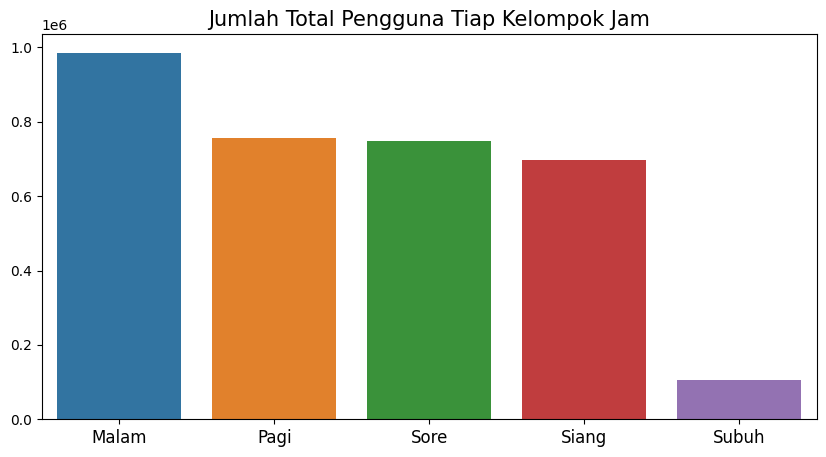

In [75]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr_group",
    hue="hr_group",
    data=hourGroup_df.sort_values(by="cnt", ascending=False),
    legend=False
)
plt.title("Jumlah Total Pengguna Tiap Kelompok Jam", loc="center", fontsize=15)
plt.xlabel(None)
plt
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:
Bagaimana perbandingan penyewaan sepeda setiap bulan selama 2 tahun

In [147]:
monthlyYear_df = day_df.groupby(by=["yr","mnth"]).cnt.sum().reset_index()
monthlyYear_df.head()

,yr,mnth,cnt
0,2011,Apr,94870
1,2011,Aug,136691
2,2011,Dec,87323
3,2011,Feb,48215
4,2011,Jan,38189


Memisah Tahun 2011 dan 2012

In [174]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

year2011=monthlyYear_df[monthlyYear_df['yr'] == '2011']
year2011 = year2011.set_index('mnth').loc[month_order].reset_index()
year2011.head()

,mnth,yr,cnt
0,Jan,2011,38189
1,Feb,2011,48215
2,Mar,2011,64045
3,Apr,2011,94870
4,May,2011,135821


In [175]:
year2012=monthlyYear_df[monthlyYear_df['yr'] == '2012']
year2012 = year2012.set_index('mnth').loc[month_order].reset_index()
year2012.head()

,mnth,yr,cnt
0,Jan,2012,96744
1,Feb,2012,103137
2,Mar,2012,164875
3,Apr,2012,174224
4,May,2012,195865


Membuat grafik garis untuk memperlihatkan perbandingan setiap bulan dalam 2 tahun

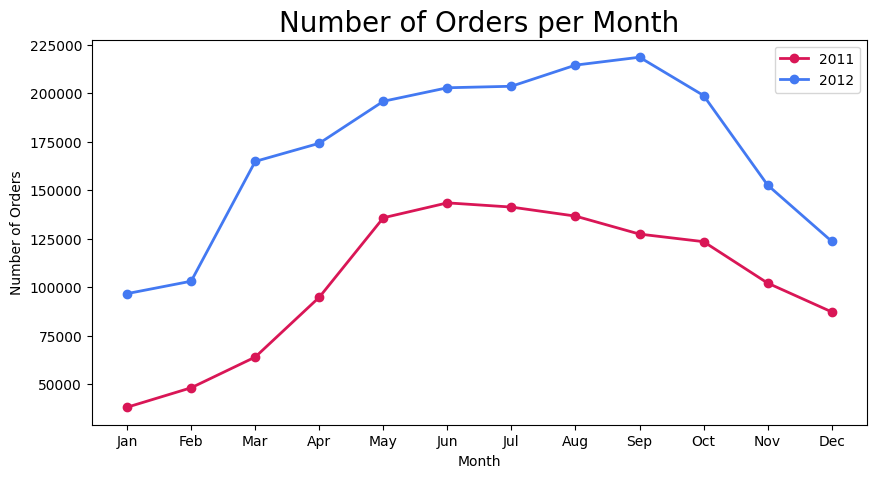

In [176]:
year2011 = year2011.reset_index()
year2012 = year2012.reset_index()
plt.figure(figsize=(10, 5))
plt.plot(year2011["mnth"], year2011["cnt"], marker='o', linewidth=2, color="#D91656")
plt.plot(year2012["mnth"], year2012["cnt"], marker='o', linewidth=2, color="#4379F2")
plt.legend(["2011", "2012"])
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 3:
Tentukan season yang paling banyak orang menyewa sepeda

Mengelompokkan total penyewa berdasarkan setiap season

In [162]:
season_df = day_df.groupby(by="season").cnt.sum().reset_index()
season_df.head()

,season,cnt
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


Menampilkan grafik

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

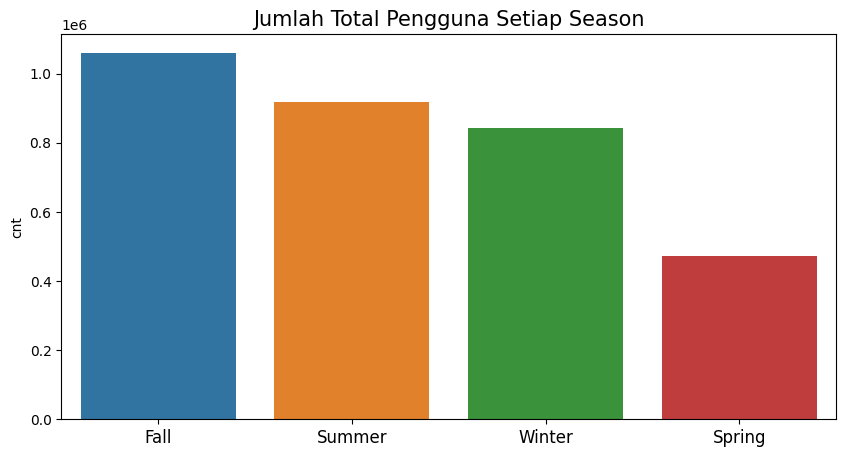

In [165]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="season",
    hue="season",
    data=hourGroup_df.sort_values(by="cnt", ascending=False),
    legend=False
)
plt.title("Jumlah Total Pengguna Setiap Season", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Berdasarkan Visualisasi pertanyaan pertama,
dapat disimpulkan bahwa kelompok jam malam memiliki jumlah total pengguna tertinggi. Ini menunjukkan bahwa waktu malam adalah periode paling sibuk atau dengan penggunaan tertinggi.
- Berdasarkan Visualisasi pertanyaan kedua,
Tren pada tahun 2012 mengalami peningkatan yang tajam dari Januari hingga Mei, dengan puncak jumlah pesanan terjadi pada bulan Juni hingga Agustus, sebelum akhirnya mengalami penurunan menuju akhir tahun, terutama di bulan November dan Desember. Kedua tahun menunjukkan pola serupa dengan peningkatan pesanan dari awal tahun hingga pertengahan tahun, diikuti oleh penurunan menuju akhir tahun. Namun, peningkatan dan penurunan di tahun 2012 jauh lebih signifikan dibandingkan dengan tahun 2011.
- Berdasarkan Visualisasi pertanyaan ketiga,
dapat disimpulkan bahwa penjualan terbanyak ada di Fall Season. Kedua tahun menunjukkan pola serupa dengan peningkatan penjualan dari awal tahun hingga pertengahan tahun, diikuti oleh penurunan menuju akhir tahun. Namun, peningkatan dan penurunan di tahun 2012 jauh lebih signifikan dibandingkan dengan tahun 2011. Kedua tahun tersebut mengalami tren penurunan di bulan-bulan akhir tahun (Oktober hingga Desember), tetapi penurunan pada tahun 2012 lebih tajam.

## Analisis Lanjutan (Opsional)

Clustering atau pengelompokan jam jam ramai atau kelompok jam yang paling banyak penyewa

In [141]:
hourGroup_df = hour_df.groupby(by="hr_group").cnt.sum().reset_index()
hourGroup_df.head()

,hr_group,cnt
0,Malam,986109
1,Pagi,755999
2,Siang,696305
3,Sore,747757
4,Subuh,106509


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

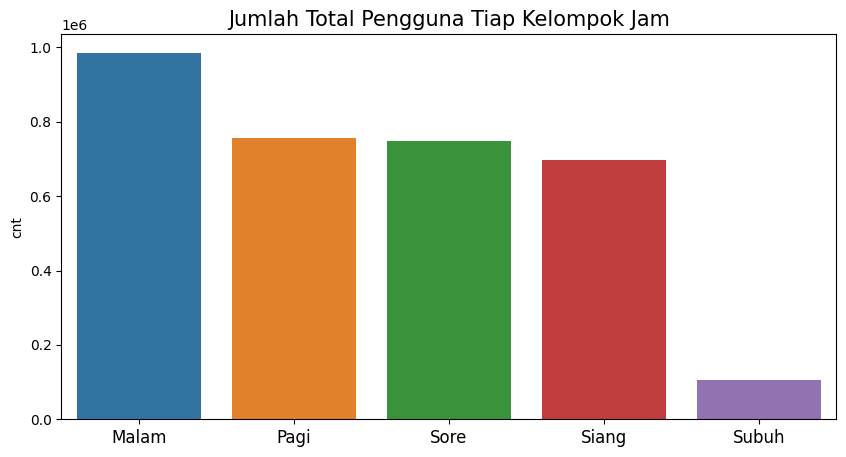

In [142]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="hr_group",
    hue="hr_group",
    data=hourGroup_df.sort_values(by="cnt", ascending=False),
    legend=False
)
plt.title("Jumlah Total Pengguna Tiap Kelompok Jam", loc="center", fontsize=15)
plt.xlabel(None)
plt
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Tingkat penjualan tertinggi terjadi pada malam hari, diikuti oleh pagi dan sore.
Tingkat penjualan paling sedikit terjadi pada jam subuh.

- Conclution pertanyaan 2 :
Tahun 2012 memiliki jumlah pesanan yang jauh lebih tinggi dibandingkan dengan tahun 2011 sepanjang tahun.
Jumlah pesanan mencapai puncak di pertengahan tahun (sekitar bulan Juni hingga Agustus), dan mengalami penurunan menjelang akhir tahun.
Tren penurunan di akhir tahun terlihat di kedua tahun, tetapi lebih tajam pada tahun 2012.
- Conclution pertanyaan 3 :
Tingkat penjualan tertinggi terjadi pada musim gugur dan musim panas.
Tingkat penjualan terendah terjadi pada musim semi.